## Answering the questions
#### days hours of the day that are busy
#### simpler price range groupings to help direct their efforts.
#### Aretherecertain types of products that are more popular than others (highest frequency of product order)
#### 


Themarketing andsales teams are particularly interested in the different types of
 customers in their system and how their ordering behaviors differ. For example:
 ○ What’sthedistribution among users in regards to their brand loyalty (i.e., how
 often do they return to Instacart)?
 
 ○ Aretheredifferences in ordering habits based on a customer’s loyalty status?
 
 ○ Aretheredifferences in ordering habits based on a customer’s region?
 
 ○ Isthere aconnection between age and family status in terms of ordering
 habits?
 
 ○ Whatdifferent classifications does the demographic information suggest?
 Age? Income? Certain types of goods? Family status?
 
 ○ Whatdifferences can you find in ordering habits of different customer
 profiles? Consider the price of orders, the frequency of orders, the products
 customers are ordering, and anything else you can think of

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
#Defining path and importing
path=r'C:\Users\banda\Instacart Basket Analysis'

ords_prods_cust_df=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','ords_prods_cust_dfmerge.pkl'))


In [3]:
ords_prods_cust_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Order_frequency_flag,First_name,Last_name,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income
0,2539329,1,1,2,8,20.0,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [4]:
ords_prods_cust_df.shape

(32404859, 31)

In [5]:
Cust_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'Cust_df_wrangle.pkl'))

In [6]:
Cust_df.head()

,user_id,First_name,Last_name,Gender,State,Age,date_joined,Number_of_dependants,Family_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374


In [7]:
Cust_df.shape

(206209, 10)

simpler price range groupings to help direct their efforts.

Instacart has a lot of products with different price tags. Marketing and sales want to
 use simpler price range groupings to help direct their efforts.

In [8]:
ords_prods_cust_df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_period_of_day',
       'busiest_days', 'max_order', 'loyalty_flag', 'mean_buyer',
       'Spending_flag', 'median_ordering', 'Order_frequency_flag',
       'First_name', 'Last_name', 'Gender', 'State', 'Age', 'date_joined',
       'Number_of_dependants', 'Family_status', 'income'],
      dtype='object')

In [9]:
ords_prods_cust_df['price_range_loc']

0           Mid-range product
1           Mid-range product
2           Mid-range product
3           Mid-range product
4           Mid-range product
                  ...        
32404854    Mid-range product
32404855    Mid-range product
32404856    Mid-range product
32404857    Mid-range product
32404858    Mid-range product
Name: price_range_loc, Length: 32404859, dtype: object

In [11]:
ords_prods_cust_df['price_range_loc'].value_counts()

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

Text(0.5, 0, 'Different price range')

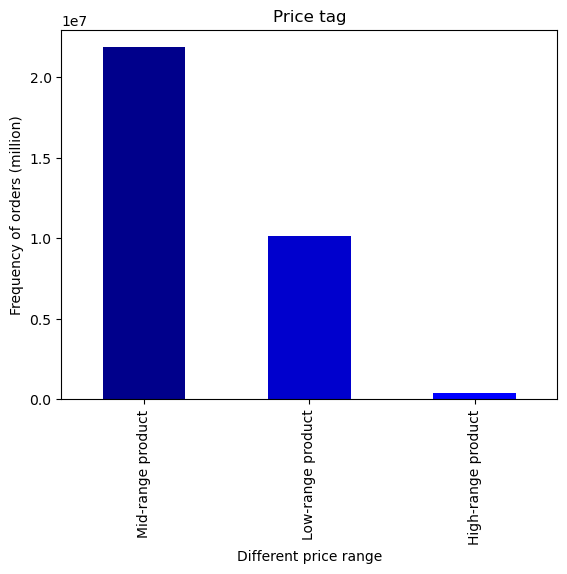

In [14]:
#creating bar chart 
bar_Price = ords_prods_cust_df['price_range_loc'].value_counts().plot.bar(color=['darkblue','mediumblue','blue'])
plt.title('Price tag')
plt.ylabel('Frequency of orders (million)')
plt.xlabel('Different price range')

In [15]:
bar_Price.figure.savefig(os.path.join(path, '04 Analysis/Visualizations/Price_range_flag.png'))

Text(0.5, 0, 'Price')

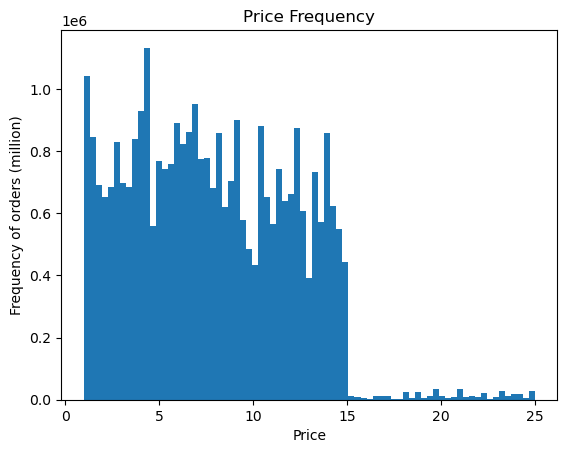

In [17]:
hist_price = ords_prods_cust_df['prices'].plot.hist(bins=75)
plt.title('Price Frequency')
plt.ylabel('Frequency of orders (million)')
plt.xlabel('Price')